In [2]:
#Game AI Using Search Algorithms
#Objective: Implement AI to solve a simple turn-based game.
#Problem Statement: Design an AI agent to play a game (e.g., Tic-Tac-Toe or
#Snake and Ladder) using search algorithms.

#Tasks:
#1. Use BFS and DFS for exploring game states.
#2. Implement A* Search with a heuristic function to improve efficiency.
#3. Compare search strategies for different game board configurations.

In [8]:
from collections import deque
import heapq

def is_win(board, player):
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] == player:
            return True
        if board[0][i] == board[1][i] == board[2][i] == player:
            return True
    if board[0][0] == board[1][1] == board[2][2] == player:
        return True
    if board[0][2] == board[1][1] == board[2][0] == player:
        return True
    return False

def is_draw(board):
    for row in board:
        for cell in row:
            if cell == '':
                return False
    return True

def dfs_tic_tac_toe(board, player):
    if is_win(board, player):
        return 1 if player == 'X' else -1
    elif is_draw(board):
        return 0
    
    best_score = -float('inf') if player == 'X' else float('inf')
    
    for i in range(3):
        for j in range(3):
            if board[i][j] == '':
                board[i][j] = player
                score = dfs_tic_tac_toe(board, 'O' if player == 'X' else 'X')
                board[i][j] = ''
                
                if player == 'X':
                    best_score = max(best_score, score)
                else:
                    best_score = min(best_score, score)
                    
    return best_score

def get_heuristic(board):
    heuristic = 0
    for i in range(3):
        for j in range(2):
            if board[i][j] == board[i][j+1] == 'X':
                heuristic += 1
            elif board[i][j] == board[i][j+1] == 'O':
                heuristic -= 1
                
    for j in range(3):
        for i in range(2):
            if board[i][j] == board[i+1][j] == 'X':
                heuristic += 1
            elif board[i][j] == board[i+1][j] == 'O':
                heuristic -= 1
                
    return heuristic

def a_star_tic_tac_toe(board, player):
    open_list = [(0, board)]
    closed_list = set()
    
    while open_list:
        estimated_cost, board_state = heapq.heappop(open_list)
        
        if tuple(map(tuple, board_state)) in closed_list:
            continue
        
        closed_list.add(tuple(map(tuple, board_state)))
        
        if is_win(board_state, player):
            return estimated_cost
        
        for i in range(3):
            for j in range(3):
                if board_state[i][j] == '':
                    new_board = [row[:] for row in board_state]
                    new_board[i][j] = player
                    
                    heuristic = get_heuristic(new_board)
                    new_cost = estimated_cost + 1 + heuristic
                    
                    heapq.heappush(open_list, (new_cost, new_board))
                    
    return -1

def bfs_snake_ladder(board):
    n = len(board)
    queue = deque([(1, 0)])
    visited = set([1])
    
    while queue:
        pos, moves = queue.popleft()
        
        if pos == n * n:
            return moves
        
        for roll in range(1, 7):
            next_pos = pos + roll
            
            if next_pos > n * n:
                continue
            
            x, y = get_coordinates(next_pos, n)
            if board[x][y] != -1:
                next_pos = board[x][y]
            
            if next_pos not in visited:
                queue.append((next_pos, moves + 1))
                visited.add(next_pos)
                
    return -1

def get_coordinates(pos, n):
    row = (pos - 1) // n
    col = (pos - 1) % n
    
    if row % 2 == 1:
        col = n - col - 1
        
    return row, col

if __name__ == "__main__":
    tic_tac_toe_board = [['' for _ in range(3)] for _ in range(3)]
    print("DFS for Tic-Tac-Toe:", dfs_tic_tac_toe(tic_tac_toe_board, 'X'))
    print("A* Search for Tic-Tac-Toe:", a_star_tic_tac_toe(tic_tac_toe_board, 'X'))
    
    snake_ladder_board = [[-1 for _ in range(5)] for _ in range(5)]
    print("BFS for Snake and Ladder:", bfs_snake_ladder(snake_ladder_board))

DFS for Tic-Tac-Toe: 0
A* Search for Tic-Tac-Toe: 3
BFS for Snake and Ladder: 4


In [14]:
from collections import deque
import heapq

def is_win(board, player):
    """Check if a player has won."""
    for i in range(3):
        if board[i][0] == board[i][1] == board[i][2] == player:
            return True
        if board[0][i] == board[1][i] == board[2][i] == player:
            return True
    if board[0][0] == board[1][1] == board[2][2] == player:
        return True
    if board[0][2] == board[1][1] == board[2][0] == player:
        return True
    return False

def is_draw(board):
    """Check if the game is a draw."""
    for row in board:
        for cell in row:
            if cell == '':
                return False
    return True

def dfs_tic_tac_toe(board, player):
    """DFS for Tic-Tac-Toe."""
    if is_win(board, player):
        return 1 if player == 'X' else -1
    elif is_draw(board):
        return 0
    
    best_score = -float('inf') if player == 'X' else float('inf')
    
    for i in range(3):
        for j in range(3):
            if board[i][j] == '':
                board[i][j] = player
                score = dfs_tic_tac_toe(board, 'O' if player == 'X' else 'X')
                board[i][j] = ''
                
                if player == 'X':
                    best_score = max(best_score, score)
                else:
                    best_score = min(best_score, score)
                    
    return best_score

def get_heuristic(board):
    """Heuristic function for A* Search."""
    heuristic = 0
    for i in range(3):
        for j in range(2):
            if board[i][j] == board[i][j+1] == 'X':
                heuristic += 1
            elif board[i][j] == board[i][j+1] == 'O':
                heuristic -= 1
                
    for j in range(3):
        for i in range(2):
            if board[i][j] == board[i+1][j] == 'X':
                heuristic += 1
            elif board[i][j] == board[i+1][j] == 'O':
                heuristic -= 1
                
    return heuristic

def a_star_tic_tac_toe(board, player):
    """A* Search for Tic-Tac-Toe."""
    open_list = [(0, board)]
    closed_list = set()
    
    while open_list:
        estimated_cost, board_state = heapq.heappop(open_list)
        
        if tuple(map(tuple, board_state)) in closed_list:
            continue
        
        closed_list.add(tuple(map(tuple, board_state)))
        
        if is_win(board_state, player):
            return estimated_cost
        
        for i in range(3):
            for j in range(3):
                if board_state[i][j] == '':
                    new_board = [row[:] for row in board_state]
                    new_board[i][j] = player
                    
                    heuristic = get_heuristic(new_board)
                    new_cost = estimated_cost + 1 + heuristic
                    
                    heapq.heappush(open_list, (new_cost, new_board))
                    
    return -1

def bfs_snake_ladder(board):
    n = len(board)
    queue = deque([(1, 0)])  # (position, moves)
    visited = set([1])
    
    while queue:
        pos, moves = queue.popleft()
        
        if pos == n * n:
            return moves
        
        for roll in range(1, 7):
            next_pos = pos + roll
            
            if next_pos > n * n:
                continue
            
            x, y = get_coordinates(next_pos, n)
            if board[x][y] != -1:
                next_pos = board[x][y]
            
            if next_pos not in visited:
                queue.append((next_pos, moves + 1))
                visited.add(next_pos)
                
    return -1

def get_coordinates(pos, n):
    row = (pos - 1) // n
    col = (pos - 1) % n
    
    if row % 2 == 1:
        col = n - col - 1
        
    return row, col

if __name__ == "__main__":
    tic_tac_toe_board = [['' for _ in range(3)] for _ in range(3)]
    print("DFS for Tic-Tac-Toe (Direction: Depth-First, exploring as far as possible along each branch):")
    print("Result:", dfs_tic_tac_toe(tic_tac_toe_board, 'X'))
    
    print("\nA* Search for Tic-Tac-Toe (Direction: Heuristic-Guided, focusing on promising paths):")
    print("Result:", a_star_tic_tac_toe(tic_tac_toe_board, 'X'))

    
    snake_ladder_board = [[-1 for _ in range(5)] for _ in range(5)]
    print("\nBFS for Snake and Ladder (Direction: Level by Level, exploring all nodes at each depth):")
    print("Result:", bfs_snake_ladder(snake_ladder_board))


DFS for Tic-Tac-Toe (Direction: Depth-First, exploring as far as possible along each branch):
Result: 0

A* Search for Tic-Tac-Toe (Direction: Heuristic-Guided, focusing on promising paths):
Result: 3

BFS for Snake and Ladder (Direction: Level by Level, exploring all nodes at each depth):
Result: 4


DFS Visualization:


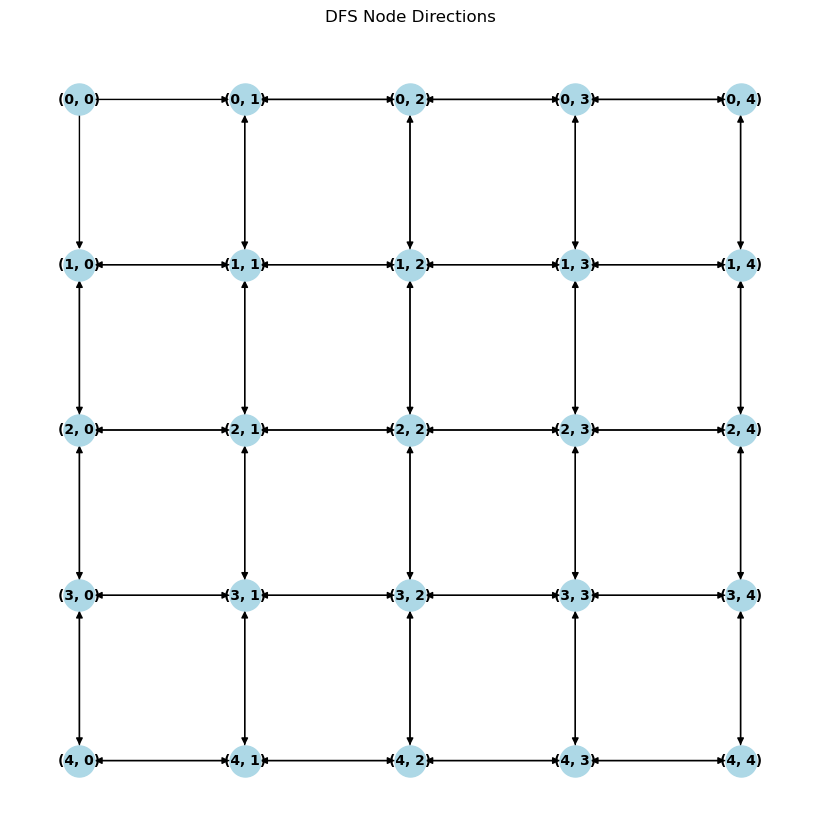


BFS Visualization:


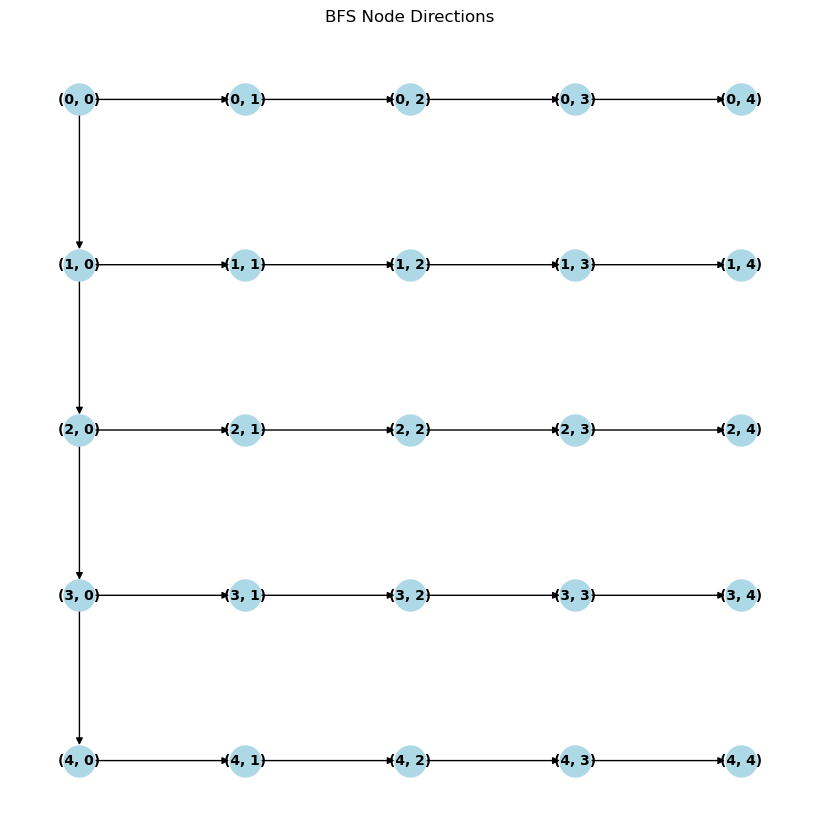


A* Search Visualization:


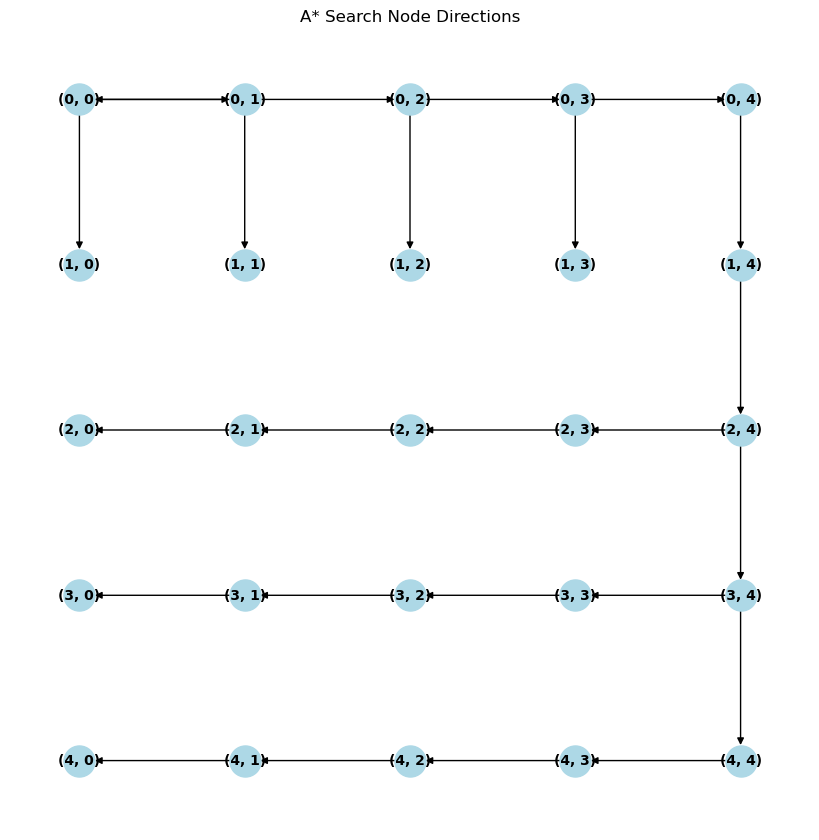

In [18]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque
import heapq

# Define grid size and directions
grid_size = 5
directions = ['up', 'down', 'left', 'right']

def visualize_directions(grid, visited_nodes, title):
    """Visualize the directions of nodes visited in a grid."""
    G = nx.DiGraph()
    n = len(grid)

    # Add nodes to the graph
    for i in range(n):
        for j in range(n):
            G.add_node((i, j))

    # Add edges based on visited nodes
    for (current, next_node) in visited_nodes:
        G.add_edge(current, next_node)

    # Create a layout for the grid
    pos = {(i, j): (j, -i) for i in range(n) for j in range(n)}

    # Draw the graph
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue", font_size=10, font_weight="bold")
    plt.title(title)
    plt.show()

def apply_move(x, y, direction):
    """Apply a move in a given direction."""
    if direction == 'up':
        return x - 1, y
    elif direction == 'down':
        return x + 1, y
    elif direction == 'left':
        return x, y - 1
    elif direction == 'right':
        return x, y + 1

def dfs_with_visualization(grid):
    """DFS with visualization of visited nodes."""
    visited_nodes = []
    n = len(grid)

    def dfs(x, y, path):
        for direction in directions:
            new_x, new_y = apply_move(x, y, direction)
            if 0 <= new_x < n and 0 <= new_y < n and (new_x, new_y) not in path:
                visited_nodes.append(((x, y), (new_x, new_y)))
                dfs(new_x, new_y, path + [(new_x, new_y)])

    dfs(0, 0, [(0, 0)])
    visualize_directions(grid, visited_nodes, "DFS Node Directions")

def bfs_with_visualization(grid):
    """BFS with visualization of visited nodes."""
    visited_nodes = []
    n = len(grid)
    queue = deque([(0, 0)])
    visited = set()

    while queue:
        x, y = queue.popleft()
        visited.add((x, y))

        for direction in directions:
            new_x, new_y = apply_move(x, y, direction)
            if 0 <= new_x < n and 0 <= new_y < n and (new_x, new_y) not in visited:
                visited_nodes.append(((x, y), (new_x, new_y)))
                queue.append((new_x, new_y))
                visited.add((new_x, new_y))

    visualize_directions(grid, visited_nodes, "BFS Node Directions")

def heuristic(x, y):
    """Example heuristic: Manhattan distance to bottom-right corner."""
    return abs(x - grid_size + 1) + abs(y - grid_size + 1)

def a_star_with_visualization(grid):
    """A* Search with visualization of visited nodes."""
    visited_nodes = []
    n = len(grid)
    open_list = [(heuristic(0, 0), (0, 0))]
    came_from = {}
    
    while open_list:
        _, (x, y) = heapq.heappop(open_list)

        for direction in directions:
            new_x, new_y = apply_move(x, y, direction)
            if 0 <= new_x < n and 0 <= new_y < n and (new_x, new_y) not in came_from:
                visited_nodes.append(((x, y), (new_x, new_y)))
                came_from[(new_x, new_y)] = (x, y)
                heapq.heappush(open_list,
                               (heuristic(new_x, new_y), (new_x, new_y)))

    visualize_directions(grid,
                         visited_nodes,
                         "A* Search Node Directions")

# Initialize the grid
grid = [[' ' for _ in range(grid_size)] for _ in range(grid_size)]

# Example usage
if __name__ == "__main__":
    print("DFS Visualization:")
    dfs_with_visualization(grid)

    print("\nBFS Visualization:")
    bfs_with_visualization(grid)

    print("\nA* Search Visualization:")
    a_star_with_visualization(grid)
